# Gesture-Phase-Detection
---

Dataset : https://archive.ics.uci.edu/ml/datasets/Gesture+Phase+Segmentation

The dataset is composed by features extracted from 7 videos with people gesticulating, aiming at studying Gesture Phase Segmentation. 
Each video is represented by two files: a raw file, which contains the position of hands, wrists, head and spine of the user in each frame; and a processed file, which contains velocity and acceleration of hands and wrists. See the data set description for more information on the dataset.

Raw files: 18 numeric attributes (double), a timestamp and a class attribute (nominal). 
Processed files: 32 numeric attributes (double) and a class attribute (nominal). 
A feature vector with up to 50 numeric attributes can be generated with the two files mentioned above.

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# read .csv from provided dataset
csv_filename1="a1_raw.csv"
csv_filename2="a1_va3.csv"

# df=pd.read_csv(csv_filename,index_col=0)
df1=pd.read_csv(csv_filename1 , skiprows=[1,2,3,4])
df2=pd.read_csv(csv_filename2)

In [7]:
df1.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp,phase
0,5.003160,4.278530,1.542866,4.985812,4.182155,1.520330,5.037557,1.619226,1.778925,5.052367,4.225485,1.775536,4.983912,4.296833,1.569889,5.193762,4.335417,1.560144,5702167,Rest
1,5.064488,4.290401,1.542146,4.955739,4.163175,1.511876,5.037724,1.618397,1.779722,5.045395,4.223284,1.777401,5.000410,4.301358,1.566544,5.164159,4.313107,1.552097,5702307,Rest
2,5.067825,4.290883,1.542058,4.928284,4.157637,1.511306,5.038332,1.618043,1.780080,5.045374,4.223690,1.777571,5.001656,4.299812,1.566537,5.136817,4.307087,1.551576,5702338,Rest
3,5.070332,4.290677,1.541985,4.916637,4.151067,1.510510,5.038742,1.618044,1.780114,5.045767,4.224827,1.777669,5.002672,4.298810,1.566489,5.125220,4.300282,1.550805,5702370,Rest
4,5.071611,4.290927,1.542046,4.906132,4.143034,1.509449,5.042224,1.618561,1.780209,5.047422,4.223671,1.778054,5.012298,4.298582,1.565061,5.114789,4.292008,1.549765,5702432,Rest


In [8]:
df1.shape

(1743, 20)

In [9]:
df1['phase'].unique()

array(['Rest', 'Preparation', 'Stroke', 'Hold', 'Retraction'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['phase'] = le.fit_transform(df1['phase'])

In [11]:
df1['phase'].unique()

array([2, 1, 4, 0, 3], dtype=int64)

In [12]:
df2.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,Phase
0,-0.005009,-0.000964,0.000573,0.008623,0.005667,0.001302,-0.000631,0.000130,-0.000048,0.007762,...,1.880800e-04,0.005133,0.010400,0.000646,0.007871,0.004631,0.000963,0.000092,0.000438,D
1,0.004905,0.001209,-0.000649,0.004737,0.003166,0.000819,-0.000572,-0.000015,0.000023,0.002706,...,-7.500000e-07,0.005093,0.005756,0.000573,0.003459,0.000730,0.000332,0.000012,0.000433,D
2,-0.002393,-0.000216,0.000136,0.003028,0.001212,0.000336,-0.000449,0.000017,0.000047,0.002868,...,-3.920000e-05,0.002406,0.003279,0.000452,0.003261,0.002412,0.000852,0.000042,0.000202,D
3,-0.001394,-0.000242,0.000056,0.001182,0.000575,0.000225,-0.000479,-0.000050,0.000104,0.001171,...,-3.184000e-05,0.001416,0.001334,0.000493,0.001358,0.000313,0.000611,0.000029,0.000596,D
4,-0.000156,-0.000004,0.000023,0.001585,0.000630,0.000094,-0.000303,0.000097,0.000065,0.001579,...,-2.015000e-05,0.000158,0.001709,0.000325,0.001713,0.000203,0.000069,0.000038,0.000069,D


In [13]:
df2.shape

(1743, 33)

In [14]:
df2['Phase'].unique()

array(['D', 'P', 'S', 'H', 'R'], dtype=object)

In [15]:
df1.columns

Index(['lhx', 'lhy', 'lhz', 'rhx', 'rhy', 'rhz', 'hx', 'hy', 'hz', 'sx', 'sy',
       'sz', 'lwx', 'lwy', 'lwz', 'rwx', 'rwy', 'rwz', 'timestamp', 'phase'],
      dtype='object')

In [16]:
df2.columns

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32', 'Phase'],
      dtype='object')

In [17]:
df2.rename(columns={'Phase': 'phase'}, inplace=True)

In [18]:
df1.phase.unique()

array([2, 1, 4, 0, 3], dtype=int64)

In [19]:
df2.phase.unique()

array(['D', 'P', 'S', 'H', 'R'], dtype=object)

In [20]:
a = df2.phase == 'D'
b = df2.phase == 'P'
c = df2.phase == 'S'
d = df2.phase == 'H'
e = df2.phase == 'R'

df2.loc[a,'phase'] = 'Rest'
df2.loc[b,'phase'] = 'Preparation'
df2.loc[c,'phase'] = 'Stroke'
df2.loc[d,'phase'] = 'Hold'
df2.loc[e,'phase'] = 'Retraction'

In [21]:
df2.head(3)

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,phase
0,-0.005009,-0.000964,0.000573,0.008623,0.005667,0.001302,-0.000631,0.000130,-0.000048,0.007762,...,1.880800e-04,0.005133,0.010400,0.000646,0.007871,0.004631,0.000963,0.000092,0.000438,Rest
1,0.004905,0.001209,-0.000649,0.004737,0.003166,0.000819,-0.000572,-0.000015,0.000023,0.002706,...,-7.500000e-07,0.005093,0.005756,0.000573,0.003459,0.000730,0.000332,0.000012,0.000433,Rest
2,-0.002393,-0.000216,0.000136,0.003028,0.001212,0.000336,-0.000449,0.000017,0.000047,0.002868,...,-3.920000e-05,0.002406,0.003279,0.000452,0.003261,0.002412,0.000852,0.000042,0.000202,Rest


In [22]:
df2.phase.unique()

array(['Rest', 'Preparation', 'Stroke', 'Hold', 'Retraction'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['phase'] = le.fit_transform(df2['phase'])

In [24]:
df2.phase.unique()

array([2, 1, 4, 0, 3], dtype=int64)

In [25]:
df1.groupby('phase').count()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,sy,sz,lwx,lwy,lwz,rwx,rwy,rwz,timestamp
phase,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
1,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163,163
2,694,694,694,694,694,694,694,694,694,694,694,694,694,694,694,694,694,694,694
3,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191,191
4,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656,656


In [26]:
df2.groupby('phase').count()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
phase,,,,,,,,,,,,,,,,,,,,,
0,39,39,39,39,39,39,39,39,39,39,...,39,39,39,39,39,39,39,39,39,39
1,163,163,163,163,163,163,163,163,163,163,...,163,163,163,163,163,163,163,163,163,163
2,694,694,694,694,694,694,694,694,694,694,...,694,694,694,694,694,694,694,694,694,694
3,191,191,191,191,191,191,191,191,191,191,...,191,191,191,191,191,191,191,191,191,191
4,656,656,656,656,656,656,656,656,656,656,...,656,656,656,656,656,656,656,656,656,656


In [27]:
df1.sort('phase',inplace=True)

In [28]:
df2.sort('phase',inplace=True)

In [29]:
df2.tail()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,phase
1117,0.013652,-0.005854,-0.000167,0.007993,0.011719,-0.001821,0.011699,-0.006116,-0.000023,0.007367,...,-0.000594,0.014855,0.014302,0.013201,0.012085,0.004621,0.012173,0.004385,0.009172,4
1118,0.025679,0.029140,0.004168,0.034294,0.008579,0.001769,0.025674,0.029158,0.004169,0.017613,...,0.000532,0.039063,0.035395,0.039073,0.018241,0.012018,0.008623,0.012314,0.005680,4
1119,0.036604,0.044513,0.005200,0.032754,-0.018750,-0.000209,0.024677,0.029102,0.003881,0.026038,...,-0.000077,0.057864,0.037742,0.038353,0.028690,0.006093,0.008853,0.000335,0.003600,4
371,-0.000753,0.010647,-0.004304,0.005471,0.010892,-0.005108,0.003455,0.007538,-0.003794,0.001323,...,0.000180,0.011508,0.013216,0.009119,0.008922,0.005335,0.005696,0.004074,0.003962,4
871,-0.001645,0.001315,0.000080,0.010487,0.026691,-0.000251,-0.005443,-0.005227,0.000392,-0.007014,...,-0.000067,0.002108,0.028678,0.007557,0.017659,0.000165,0.001954,0.004185,0.004051,4


In [30]:
left = pd.DataFrame({
   ....:                      'key2': ['0', '2', '1', '3','0','1'],
   ....:                      'A': ['A0', 'A1', 'A2', 'A3','A4','A5'],
   ....:                      'B': ['B0', 'B1', 'B2', 'B3','B4','B5']})
   ....: 

right = pd.DataFrame({
   ....:                       'key2': ['0', '1', '2', '0', '1', '3'],
   ....:                       'C': ['C0', 'C1', 'C2', 'C3', 'C4', 'C5'],
   ....:                       'D': ['D0', 'D1', 'D2', 'D3', 'D4', 'D5']})
   ....: 

In [31]:
left

,A,B,key2
0,A0,B0,0
1,A1,B1,2
2,A2,B2,1
3,A3,B3,3
4,A4,B4,0
5,A5,B5,1


In [32]:
right

,C,D,key2
0,C0,D0,0
1,C1,D1,1
2,C2,D2,2
3,C3,D3,0
4,C4,D4,1
5,C5,D5,3


In [33]:
left.sort('key2',inplace=True)

In [34]:
left

,A,B,key2
0,A0,B0,0
4,A4,B4,0
2,A2,B2,1
5,A5,B5,1
1,A1,B1,2
3,A3,B3,3


In [35]:
right.sort('key2',inplace=True)

In [36]:
right

,C,D,key2
0,C0,D0,0
3,C3,D3,0
1,C1,D1,1
4,C4,D4,1
2,C2,D2,2
5,C5,D5,3


In [37]:
result = pd.merge(left, right, on=['key2'])

In [38]:
result

,A,B,key2,C,D
0,A0,B0,0,C0,D0
1,A0,B0,0,C3,D3
2,A4,B4,0,C0,D0
3,A4,B4,0,C3,D3
4,A2,B2,1,C1,D1
5,A2,B2,1,C4,D4
6,A5,B5,1,C1,D1
7,A5,B5,1,C4,D4
8,A1,B1,2,C2,D2
9,A3,B3,3,C5,D5


In [39]:
result2 = pd.merge(left, right, on=['key2'], how='right')

In [40]:
result2

,A,B,key2,C,D
0,A0,B0,0,C0,D0
1,A4,B4,0,C0,D0
2,A0,B0,0,C3,D3
3,A4,B4,0,C3,D3
4,A2,B2,1,C1,D1
5,A5,B5,1,C1,D1
6,A2,B2,1,C4,D4
7,A5,B5,1,C4,D4
8,A1,B1,2,C2,D2
9,A3,B3,3,C5,D5


In [41]:
df = pd.merge(df1, df2, on='phase')

In [42]:
df.head()

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,23,24,25,26,27,28,29,30,31,32
0,1.843293,3.074965,1.644773,8.228968,3.020815,1.570013,5.03905,1.756163,1.734586,5.049521,...,-0.000049,0.000047,0.001516,0.001352,0.001703,0.001068,0.000416,0.000397,0.000240,0.000422
1,1.843293,3.074965,1.644773,8.228968,3.020815,1.570013,5.03905,1.756163,1.734586,5.049521,...,-0.000273,0.000059,0.007427,0.017248,0.003709,0.012792,0.000039,0.000174,0.000440,0.000281
2,1.843293,3.074965,1.644773,8.228968,3.020815,1.570013,5.03905,1.756163,1.734586,5.049521,...,-0.002584,-0.000602,0.007392,0.017023,0.002659,0.012178,0.002543,0.005297,0.001246,0.004187
3,1.843293,3.074965,1.644773,8.228968,3.020815,1.570013,5.03905,1.756163,1.734586,5.049521,...,0.000008,0.000070,0.000688,0.001083,0.001302,0.000407,0.000281,0.000334,0.000434,0.000264
4,1.843293,3.074965,1.644773,8.228968,3.020815,1.570013,5.03905,1.756163,1.734586,5.049521,...,-0.000092,-0.000110,0.001527,0.001989,0.001715,0.001108,0.000086,0.000280,0.000341,0.000221


In [43]:
df.columns

Index(['lhx', 'lhy', 'lhz', 'rhx', 'rhy', 'rhz', 'hx', 'hy', 'hz', 'sx', 'sy',
       'sz', 'lwx', 'lwy', 'lwz', 'rwx', 'rwy', 'rwz', 'timestamp', 'phase',
       '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '29', '30', '31', '32'],
      dtype='object')

In [44]:
df[:1]

,lhx,lhy,lhz,rhx,rhy,rhz,hx,hy,hz,sx,...,23,24,25,26,27,28,29,30,31,32
0,1.843293,3.074965,1.644773,8.228968,3.020815,1.570013,5.03905,1.756163,1.734586,5.049521,...,-0.000049,0.000047,0.001516,0.001352,0.001703,0.001068,0.000416,0.000397,0.00024,0.000422


In [45]:
df1.shape,df2.shape,df.shape

((1743, 20), (1743, 33), (976543, 52))

In [46]:
df.drop('timestamp', axis=1, inplace=True)

In [47]:
cols = list(df.columns)
features = cols
features.remove('phase')

In [48]:
len(features)

50

In [49]:
df1.shape,df2.shape,df.shape

((1743, 20), (1743, 33), (976543, 51))

In [50]:
df1.drop('phase',axis=1,inplace=True)

In [51]:
df_1 = pd.concat([df1,df2],axis=1)

In [52]:
df_1.drop('timestamp' , axis=1, inplace=True )

In [53]:
df_1.shape

(1743, 51)

In [54]:
cols = list(df_1.columns)
features = cols
features.remove('phase')

In [55]:
X = df_1[features]
y = df_1['phase']

In [56]:
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [58]:
print (X_train.shape, y_train.shape)

(1045, 50) (1045,)


# Unsupervised Learning

## PCA

In [59]:
len(features)

50

In [60]:
# Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension
print(pca.components_)
print(pca.explained_variance_ratio_)

[[ -3.24581191e-01  -2.92251490e-01   7.53364165e-03 ...,   3.24728085e-04
    3.41055456e-04   3.57808090e-04]
 [ -3.61481275e-01  -3.43404679e-01  -9.08432680e-04 ...,  -5.07423576e-04
    9.78392399e-05  -2.70505189e-04]
 [  2.37097518e-01  -5.92270728e-01  -1.24632609e-02 ...,   3.58624880e-04
    3.90482340e-04   1.93933193e-04]
 ..., 
 [  4.04553884e-05  -7.12943663e-05   1.15402630e-03 ...,  -4.86619567e-03
    1.48671225e-02  -7.35656948e-03]
 [  1.29660243e-04   2.43834901e-05   9.59580183e-04 ...,   2.71273032e-03
   -1.29078542e-02  -4.33512842e-03]
 [ -6.46273141e-05  -7.94059286e-05  -8.03733060e-04 ...,  -3.07743917e-05
    5.64481537e-03   4.41337238e-04]]
[  5.43602019e-01   1.94609502e-01   1.79945381e-01   6.06757941e-02
   6.51627887e-03   3.58008210e-03   2.67915903e-03   2.33392917e-03
   1.79531854e-03   1.48063948e-03   8.24068490e-04   6.16949441e-04
   5.22681332e-04   3.02808424e-04   9.48140982e-05   8.22443484e-05
   6.86532264e-05   5.74845805e-05   5.44861

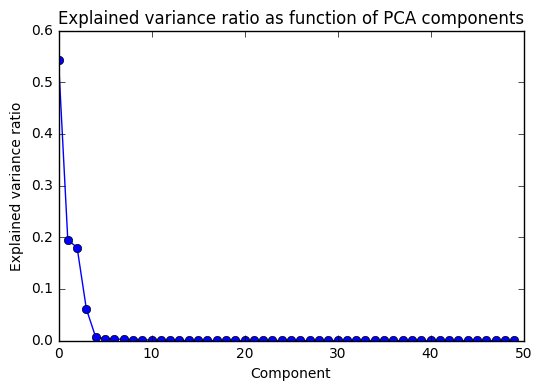

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(pca.explained_variance_ratio_),'-o')
plt.title('Explained variance ratio as function of PCA components')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component')
plt.show()

In [62]:
# First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
print(reduced_data[:10])  # print upto 10 elements

[[ 4.97920203  1.99254767]
 [-1.05764711 -0.24918246]
 [-1.0436656  -0.27278704]
 [-0.54357051 -0.36484743]
 [-0.55093989 -0.38420189]
 [-0.55136204 -0.39983171]
 [ 4.89826696  1.9399872 ]
 [ 4.90657144  1.94518439]
 [ 4.9156538   1.95073956]
 [ 4.92688358  1.95743474]]


In [63]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [64]:
kmeans = KMeans(n_clusters=5)
clusters = kmeans.fit(reduced_data)
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [65]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [66]:
# Find the centroids for KMeans or the cluster means for GMM 

centroids = kmeans.cluster_centers_
print('*** K MEANS CENTROIDS ***')
print(centroids)

# TRANSFORM DATA BACK TO ORIGINAL SPACE FOR ANSWERING 7
print('*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***')
print(pca.inverse_transform(centroids))

*** K MEANS CENTROIDS ***
[[-1.17899217  0.10923204]
 [ 0.27548729 -0.38245498]
 [ 3.756748    0.90595973]
 [ 1.39096176 -1.96519098]
 [ 0.75118636  1.29505563]]
*** CENTROIDS TRANSFERED TO ORIGINAL SPACE ***
[[  5.07538292e+00   4.41675804e+00   1.48300647e+00   4.89805784e+00
    4.42388104e+00   1.47298994e+00   5.11735459e+00   1.65395594e+00
    1.75891510e+00   5.11532176e+00   4.27820796e+00   1.74234987e+00
    4.87798635e+00   4.39801313e+00   1.52204810e+00   5.11281319e+00
    4.41659689e+00   1.50415344e+00  -5.40056281e-04  -4.95952441e-04
    1.44278537e-05   9.41674920e-04  -1.35628216e-03  -5.30549161e-05
   -3.36744289e-04  -4.49121329e-04   6.24981635e-06   7.16538288e-04
   -1.19945479e-03  -7.60296260e-05   1.61708693e-05   8.25263536e-05
   -6.08851488e-06  -5.56774559e-05   9.80624431e-05  -2.71805994e-05
    3.50391876e-05   8.09840737e-05  -3.19512796e-06  -4.32899449e-05
    9.60457482e-05  -2.31884663e-05   6.89822610e-03   8.87193291e-03
    5.54773746e-03   

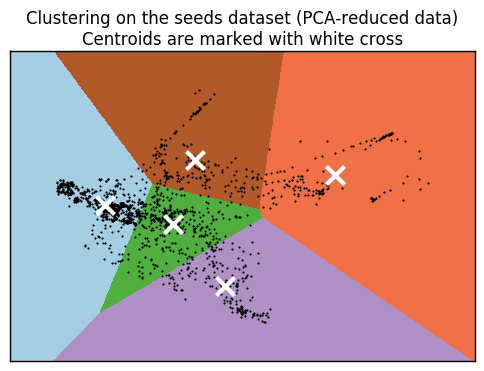

In [67]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the seeds dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

### Applying agglomerative clustering via scikit-learn

In [68]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
print('Cluster labels: %s' % labels)

Cluster labels: [3 2 2 ..., 2 3 0]


___

In [69]:
X = df_1[features]
y = df_1['phase']
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

### K Means

In [70]:
from sklearn import cluster
clf = cluster.KMeans(init='k-means++', n_clusters=5, random_state=5)
clf.fit(X_train)
print clf.labels_.shape
print clf.labels_

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-70-ad1ef4095e7d>, line 4)

In [ ]:
# Predict clusters on testing data
y_pred = clf.predict(X_test)

In [ ]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

### Affinity Propogation

In [ ]:
# Affinity propagation
aff = cluster.AffinityPropagation()
aff.fit(X_train)
print aff.cluster_centers_indices_.shape

In [ ]:
y_pred = aff.predict(X_test)

In [ ]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

## MeanShift

In [ ]:
ms = cluster.MeanShift()
ms.fit(X_train)

In [ ]:
y_pred = ms.predict(X_test)

In [ ]:
from sklearn import metrics
print "Addjusted rand score:{:.2}".format(metrics.adjusted_rand_score(y_test, y_pred))
print "Homogeneity score:{:.2} ".format(metrics.homogeneity_score(y_test, y_pred)) 
print "Completeness score: {:.2} ".format(metrics.completeness_score(y_test, y_pred))
print "Confusion matrix"
print metrics.confusion_matrix(y_test, y_pred)

### Mixture of Guassian Models

In [ ]:
from sklearn import mixture

# Define a heldout dataset to estimate covariance type
X_train_heldout, X_test_heldout, y_train_heldout, y_test_heldout = train_test_split(
        X_train, y_train,test_size=0.25, random_state=42)
for covariance_type in ['spherical','tied','diag','full']:
    gm=mixture.GMM(n_components=100, covariance_type=covariance_type, random_state=42, n_init=5)
    gm.fit(X_train_heldout)
    y_pred=gm.predict(X_test_heldout)
    print "Adjusted rand score for covariance={}:{:.2}".format(covariance_type, 
                                                               metrics.adjusted_rand_score(y_test_heldout, y_pred))


___

In [71]:
pca = PCA(n_components=2)
X = pca.fit_transform(X)

In [72]:
c = []
from matplotlib.pyplot import cm 
n=6
color=iter(cm.rainbow(np.linspace(0,1,n)))
for i in range(n):
    c.append(next(color))

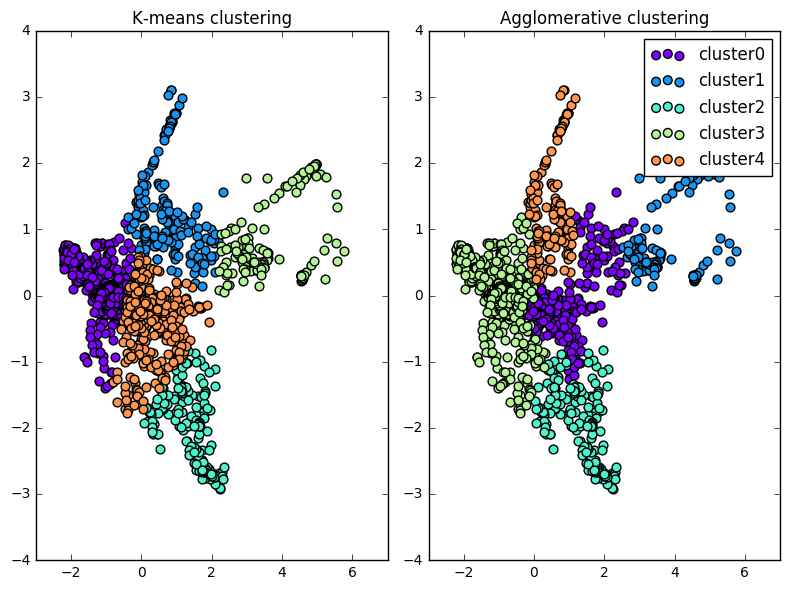

In [73]:
n = 5
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,6))

km = KMeans(n_clusters= n , random_state=0)
y_km = km.fit_predict(X)

for i in range(n):
    ax1.scatter(X[y_km==i,0], X[y_km==i,1], c=c[i], marker='o', s=40, label='cluster{}'.format(i))
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='complete')
y_ac = ac.fit_predict(X)
for i in range(n):
    ax2.scatter(X[y_ac==i,0], X[y_ac==i,1], c=c[i], marker='o', s=40, label='cluster{}'.format(i))
ax2.set_title('Agglomerative clustering')

# Put a legend below current axis
plt.legend()
    
plt.tight_layout()
#plt.savefig('./figures/kmeans_and_ac.png', dpi=300)
plt.show()

____

# Classification

In [74]:
import os
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation, metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from time import time
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score , classification_report
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report


In [75]:
X = df_1[features]
y = df_1['phase']
# split dataset to 60% training and 40% testing
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [77]:
print (X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(1045, 50) (1045,) (698, 50) (698,)


# Decision Tree accuracy and time elapsed caculation

In [79]:
t0=time()
print ("DecisionTree")

dt = DecisionTreeClassifier(min_samples_split=20,random_state=99)
# dt = DecisionTreeClassifier(min_samples_split=20,max_depth=5,random_state=99)

clf_dt=dt.fit(X_train,y_train)

print ("Acurracy: ", clf_dt.score(X_test,y_test))
t1=time()
print ("time elapsed: ", t1-t0)

DecisionTree
Acurracy:  0.823782234957
time elapsed:  0.15800905227661133


In [80]:
tt0=time()
print ("cross result========")
scores = cross_validation.cross_val_score(dt, X,y, cv=5)
print (scores)
print (scores.mean())
tt1=time()
print ("time elapsed: ", tt1-tt0)

cross result========
[ 0.49287749  0.7277937   0.64756447  0.68678161  0.5433526 ]
0.619673973884
time elapsed:  1.3700783252716064


# Random Forest accuracy and time elapsed caculation

In [83]:
t2=time()
print ("RandomForest")
rf = RandomForestClassifier(n_estimators=100,n_jobs=-1)
clf_rf = rf.fit(X_train,y_train)
print ("Acurracy: ", clf_rf.score(X_test,y_test))
t3=time()
print ("time elapsed: ", t3-t2)

RandomForest
Acurracy:  0.893982808023
time elapsed:  0.8110466003417969


In [84]:
tt2=time()
print ("cross result========")
scores = cross_validation.cross_val_score(rf, X,y, cv=5)
print (scores)
print (scores.mean())
tt3=time()
print ("time elapsed: ", tt3-tt2)


cross result========
[ 0.74928775  0.79083095  0.79369628  0.79022989  0.70520231]
0.765849433423
time elapsed:  4.255243301391602


# Naive Bayes accuracy and time elapsed caculation


In [85]:
t4=time()
print ("NaiveBayes")
nb = BernoulliNB()
clf_nb=nb.fit(X_train,y_train)
print ("Acurracy: ", clf_nb.score(X_test,y_test))
t5=time()
print ("time elapsed: ", t5-t4)

NaiveBayes
Acurracy:  0.385386819484
time elapsed:  0.01000070571899414


In [89]:
tt4=time()
print ("cross result========")
scores = cross_validation.cross_val_score(nb, X,y, cv=5)
print (scores)
print (scores.mean())
tt5=time()
print ("time elapsed: ", tt5-tt4)

cross result========
[ 0.39031339  0.37249284  0.40974212  0.37356322  0.43641618]
0.396505550139
time elapsed:  0.19201111793518066


# KNN accuracy and time elapsed caculation

In [91]:
t6=time()
print ("KNN")
# knn = KNeighborsClassifier(n_neighbors=3)
knn = KNeighborsClassifier()
clf_knn=knn.fit(X_train, y_train)
print ("Acurracy: ", clf_knn.score(X_test,y_test) )
t7=time()
print ("time elapsed: ", t7-t6)

KNN
Acurracy:  0.843839541547
time elapsed:  0.059003353118896484


In [92]:
tt6=time()
print ("cross result========")
scores = cross_validation.cross_val_score(knn, X,y, cv=5)
print (scores)
print (scores.mean())
tt7=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.56410256  0.63896848  0.70487106  0.73563218  0.54913295]
0.638541447507
time elapsed:  0.23401331901550293


# SVM accuracy and time elapsed caculation

In [93]:
t7=time()
print ("SVM")
svc = SVC()
clf_svc=svc.fit(X_train, y_train)
print ("Acurracy: ", clf_svc.score(X_test,y_test) )
t8=time()
print ("time elapsed: ", t8-t7)

SVM
Acurracy:  0.753581661891
time elapsed:  0.2240126132965088


In [94]:
tt7=time()
print ("cross result========")
scores = cross_validation.cross_val_score(svc, X,y, cv=5)
print (scores)
print (scores.mean())
tt8=time()
print ("time elapsed: ", tt7-tt6)

cross result========
[ 0.73504274  0.7277937   0.77363897  0.75287356  0.6300578 ]
0.723881353297
time elapsed:  33.91093945503235


In [95]:
from sklearn.svm import SVC
from sklearn.cross_validation import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn import grid_search

svc = SVC()

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}

grid = grid_search.GridSearchCV(svc, parameters, n_jobs=-1, verbose=1, scoring='accuracy')


grid.fit(X_train, y_train)

print ('Best score: %0.3f' % grid.best_score_)

print ('Best parameters set:')
best_parameters = grid.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid.predict(X_test)
print (classification_report(y_test, predictions))

Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed:    9.7s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    9.9s finished


Best score: 0.779
Best parameters set:
	C: 10
	kernel: 'linear'
             precision    recall  f1-score   support

          0       1.00      0.22      0.36        18
          1       0.32      0.19      0.24        57
          2       0.84      0.98      0.91       280
          3       0.76      0.27      0.40        82
          4       0.79      0.92      0.85       261

avg / total       0.77      0.79      0.76       698



In [96]:
pipeline = Pipeline([
    ('clf', SVC(kernel='rbf', gamma=0.01, C=100))
])

parameters = {
    'clf__gamma': (0.01, 0.03, 0.1, 0.3, 1),
    'clf__C': (0.1, 0.3, 1, 3, 10, 30),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search.fit(X_train, y_train)

print ('Best score: %0.3f' % grid_search.best_score_)

print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))
    
predictions = grid_search.predict(X_test)
print (classification_report(y_test, predictions))

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   11.8s finished


Best score: 0.879
Best parameters set:
	clf__C: 30
	clf__gamma: 1
             precision    recall  f1-score   support

          0       0.89      0.89      0.89        18
          1       0.55      0.63      0.59        57
          2       0.94      0.96      0.95       280
          3       0.85      0.77      0.81        82
          4       0.93      0.91      0.92       261

avg / total       0.89      0.89      0.89       698



# Ensemble Learning

In [97]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator


class MajorityVoteClassifier(BaseEstimator, 
                             ClassifierMixin):
    """ A majority vote ensemble classifier

    Parameters
    ----------
    classifiers : array-like, shape = [n_classifiers]
      Different classifiers for the ensemble

    vote : str, {'classlabel', 'probability'} (default='label')
      If 'classlabel' the prediction is based on the argmax of
        class labels. Else if 'probability', the argmax of
        the sum of probabilities is used to predict the class label
        (recommended for calibrated classifiers).

    weights : array-like, shape = [n_classifiers], optional (default=None)
      If a list of `int` or `float` values are provided, the classifiers
      are weighted by importance; Uses uniform weights if `weights=None`.

    """
    def __init__(self, classifiers, vote='classlabel', weights=None):

        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value
                                  in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
        """ Fit classifiers.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        y : array-like, shape = [n_samples]
            Vector of target class labels.

        Returns
        -------
        self : object

        """
        if self.vote not in ('probability', 'classlabel'):
            raise ValueError("vote must be 'probability' or 'classlabel'"
                             "; got (vote=%r)"
                             % self.vote)

        if self.weights and len(self.weights) != len(self.classifiers):
            raise ValueError('Number of classifiers and weights must be equal'
                             '; got %d weights, %d classifiers'
                             % (len(self.weights), len(self.classifiers)))

        # Use LabelEncoder to ensure class labels start with 0, which
        # is important for np.argmax call in self.predict
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X, self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

    def predict(self, X):
        """ Predict class labels for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Matrix of training samples.

        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
            Predicted class labels.
            
        """
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(X), axis=1)
        else:  # 'classlabel' vote

            #  Collect results from clf.predict calls
            predictions = np.asarray([clf.predict(X)
                                      for clf in self.classifiers_]).T

            maj_vote = np.apply_along_axis(
                                      lambda x:
                                      np.argmax(np.bincount(x,
                                                weights=self.weights)),
                                      axis=1,
                                      arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
        return maj_vote

    def predict_proba(self, X):
        """ Predict class probabilities for X.

        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.

        Returns
        ----------
        avg_proba : array-like, shape = [n_samples, n_classes]
            Weighted average probability for each class per sample.

        """
        probas = np.asarray([clf.predict_proba(X)
                             for clf in self.classifiers_])
        avg_proba = np.average(probas, axis=0, weights=self.weights)
        return avg_proba

    def get_params(self, deep=True):
        """ Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep=False)
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep=True)):
                    out['%s__%s' % (name, key)] = value
            return out

In [98]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler

clf1 = LogisticRegression(penalty='l2', 
                          C=0.001, 
                          random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1, 
                              criterion='entropy', 
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1, 
                            p=2, 
                            metric='minkowski')

pipe1 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()],
                  ['clf', clf3]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN']

print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))


10-fold cross validation:

Accuracy: 0.74 (+/- 0.02) [Logistic Regression]
Accuracy: 0.66 (+/- 0.02) [Decision Tree]
Accuracy: 0.86 (+/- 0.03) [KNN]


In [99]:
# Majority Rule (hard) Voting

mv_clf = MajorityVoteClassifier(
                classifiers=[pipe1, clf2, pipe3])

clf_labels += ['Majority Voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]

for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, 
                             X=X_train, 
                             y=y_train, 
                             cv=10, 
                             scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
               % (scores.mean(), scores.std(), label))

Accuracy: 0.74 (+/- 0.02) [Logistic Regression]
Accuracy: 0.66 (+/- 0.02) [Decision Tree]
Accuracy: 0.86 (+/- 0.03) [KNN]
Accuracy: 0.76 (+/- 0.02) [Majority Voting]


In [100]:
mv_clf.get_params()

{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
             max_features=None, max_leaf_nodes=None,
             min_impurity_split=1e-07, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             presort=False, random_state=0, splitter='best'),
 'decisiontreeclassifier__class_weight': None,
 'decisiontreeclassifier__criterion': 'entropy',
 'decisiontreeclassifier__max_depth': 1,
 'decisiontreeclassifier__max_features': None,
 'decisiontreeclassifier__max_leaf_nodes': None,
 'decisiontreeclassifier__min_impurity_split': 1e-07,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2,
 'decisiontreeclassifier__min_weight_fraction_leaf': 0.0,
 'decisiontreeclassifier__presort': False,
 'decisiontreeclassifier__random_state': 0,
 'decisiontreeclassifier__splitter': 'best',
 'pipeline-1': Pipeline(steps=[['sc', StandardScaler(copy=True, with_mean=True, with_

In [101]:
from sklearn.grid_search import GridSearchCV

params = {'decisiontreeclassifier__max_depth': [1, 2],
          'pipeline-1__clf__C': [0.001, 0.1, 100.0]}

grid = GridSearchCV(estimator=mv_clf, 
                    param_grid=params, 
                    cv=10, 
                    scoring='accuracy')
grid.fit(X_train, y_train)

for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f+/-%0.2f %r"
            % (mean_score, scores.std() / 2, params))

0.757+/-0.01 {'pipeline-1__clf__C': 0.001, 'decisiontreeclassifier__max_depth': 1}
0.802+/-0.01 {'pipeline-1__clf__C': 0.1, 'decisiontreeclassifier__max_depth': 1}
0.836+/-0.01 {'pipeline-1__clf__C': 100.0, 'decisiontreeclassifier__max_depth': 1}
0.782+/-0.01 {'pipeline-1__clf__C': 0.001, 'decisiontreeclassifier__max_depth': 2}
0.815+/-0.01 {'pipeline-1__clf__C': 0.1, 'decisiontreeclassifier__max_depth': 2}
0.845+/-0.01 {'pipeline-1__clf__C': 100.0, 'decisiontreeclassifier__max_depth': 2}


In [102]:
print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

Best parameters: {'pipeline-1__clf__C': 100.0, 'decisiontreeclassifier__max_depth': 2}
Accuracy: 0.84


## Bagging -- Building an ensemble of classifiers from bootstrap samples

In [103]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=None)

bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500, 
                        max_samples=1.0, 
                        max_features=1.0, 
                        bootstrap=True, 
                        bootstrap_features=False, 
                        n_jobs=1, 
                        random_state=1)

from sklearn.metrics import accuracy_score

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)

bag_train = accuracy_score(y_train, y_train_pred) 
bag_test = accuracy_score(y_test, y_test_pred) 
print('Bagging train/test accuracies %.3f/%.3f'
      % (bag_train, bag_test))

Decision tree train/test accuracies 1.000/0.832
Bagging train/test accuracies 1.000/0.903


## Leveraging weak learners via adaptive boosting

In [104]:
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=1)

ada = AdaBoostClassifier(base_estimator=tree,
                         n_estimators=500, 
                         learning_rate=0.1,
                         random_state=0)

tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f'
      % (tree_train, tree_test))

ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

ada_train = accuracy_score(y_train, y_train_pred) 
ada_test = accuracy_score(y_test, y_test_pred) 
print('AdaBoost train/test accuracies %.3f/%.3f'
      % (ada_train, ada_test))

Decision tree train/test accuracies 0.665/0.672
AdaBoost train/test accuracies 0.772/0.734


___